In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

## Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import time
from models.ffnn import FFNN

## Load Dataset

In [3]:
print("Downloading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
X = X.astype(float)
y = y.astype(int)

## Preprocessing

In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
X = X / 255.0

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))

In [8]:
input_size = 784
hidden_sizes = [64] 
output_size = 10

## Experiment 1
Learning Rate = 0.001


Training custom FFNN model...
Epoch 1/10, Train Loss: 1.3913
Epoch 2/10, Train Loss: 0.7703
Epoch 3/10, Train Loss: 0.6109
Epoch 4/10, Train Loss: 0.5343
Epoch 5/10, Train Loss: 0.4882
Epoch 6/10, Train Loss: 0.4568
Epoch 7/10, Train Loss: 0.4340
Epoch 8/10, Train Loss: 0.4165
Epoch 9/10, Train Loss: 0.4025
Epoch 10/10, Train Loss: 0.3911
Custom FFNN training time: 12.53 seconds
Accuracy: 0.8929285714285714


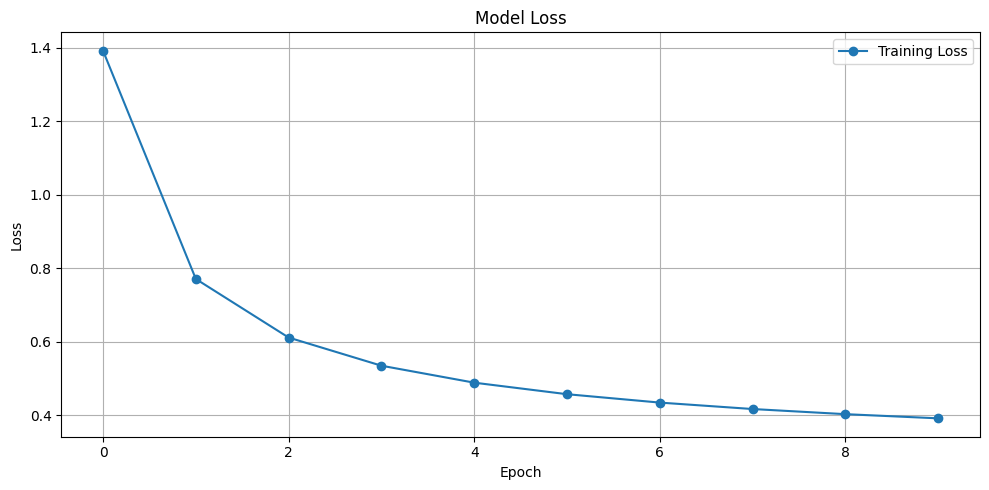

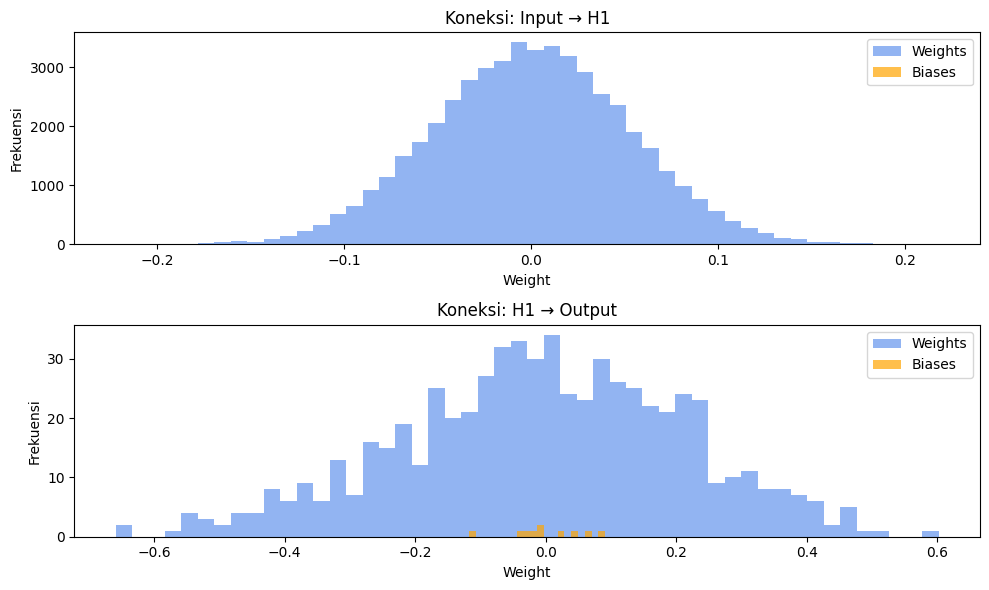

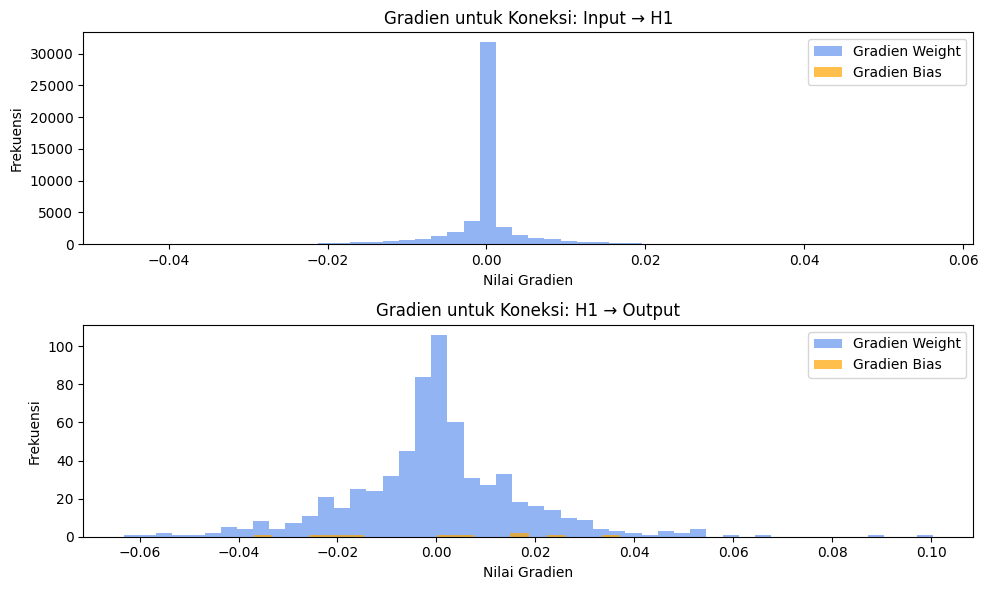

In [9]:
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['linear'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.001,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()

## Experiment 2
Learning Rate = 0.01


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.6004
Epoch 2/10, Train Loss: 0.3612
Epoch 3/10, Train Loss: 0.3282
Epoch 4/10, Train Loss: 0.3123
Epoch 5/10, Train Loss: 0.3018
Epoch 6/10, Train Loss: 0.2948
Epoch 7/10, Train Loss: 0.2890
Epoch 8/10, Train Loss: 0.2845
Epoch 9/10, Train Loss: 0.2807
Epoch 10/10, Train Loss: 0.2774
Custom FFNN training time: 14.06 seconds
Accuracy: 0.9192857142857143


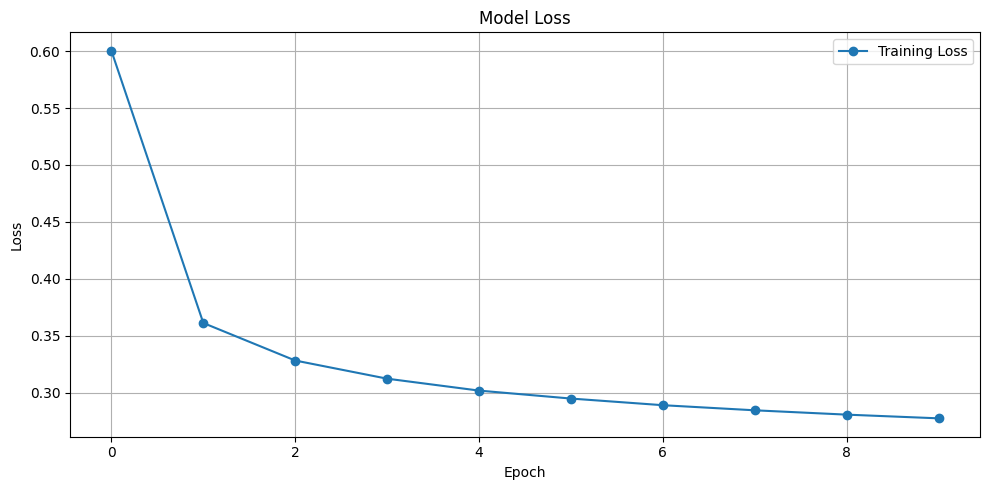

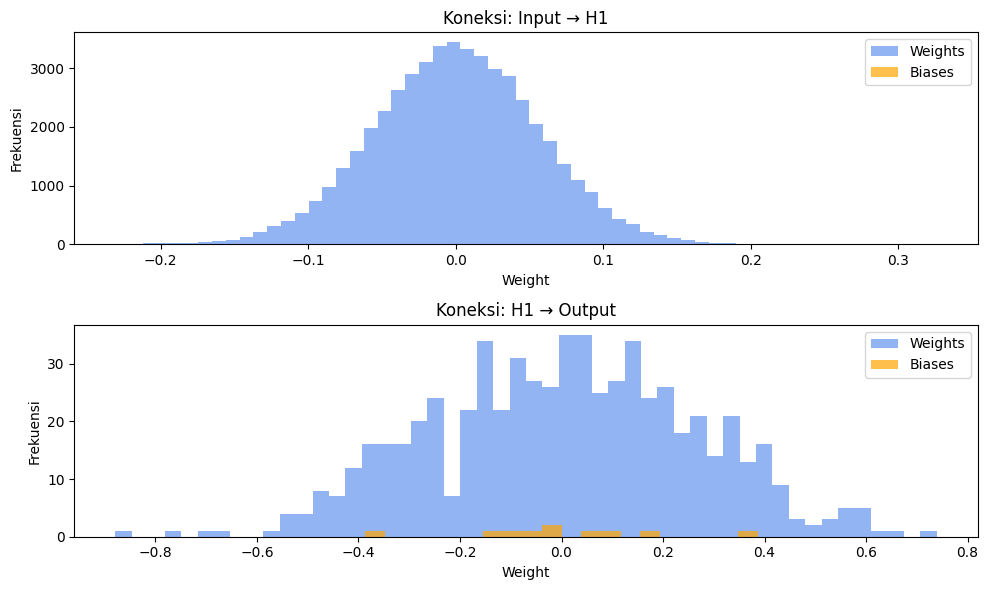

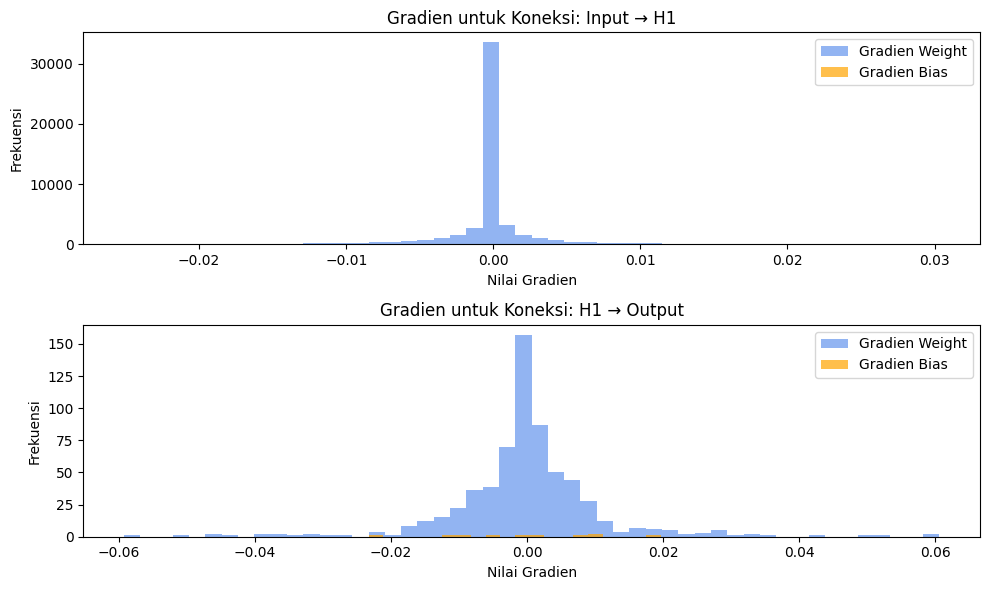

In [10]:
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['linear'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()

## Experiment 2
Learning Rate = 0.1


Training custom FFNN model...
Epoch 1/10, Train Loss: 0.3720
Epoch 2/10, Train Loss: 0.3059
Epoch 3/10, Train Loss: 0.2936
Epoch 4/10, Train Loss: 0.2868
Epoch 5/10, Train Loss: 0.2806
Epoch 6/10, Train Loss: 0.2776
Epoch 7/10, Train Loss: 0.2753
Epoch 8/10, Train Loss: 0.2719
Epoch 9/10, Train Loss: 0.2706
Epoch 10/10, Train Loss: 0.2693
Custom FFNN training time: 13.23 seconds
Accuracy: 0.9106428571428572


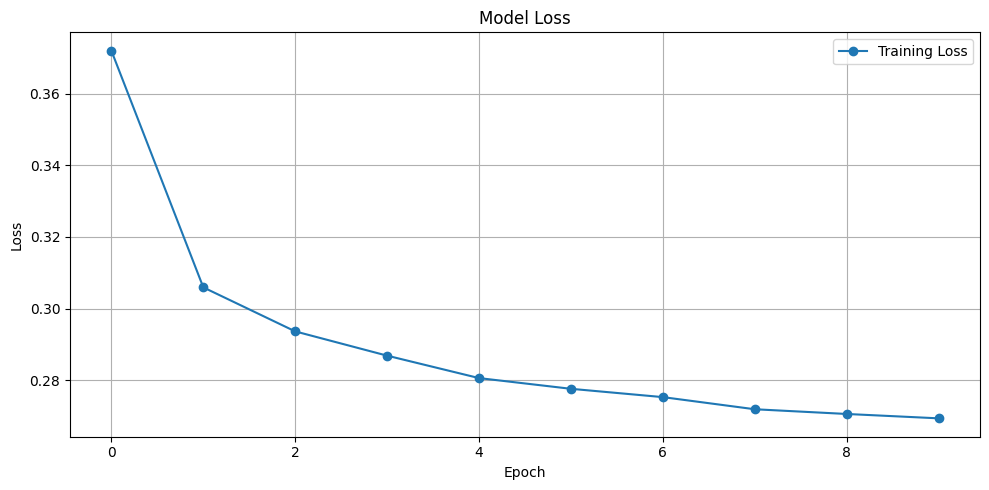

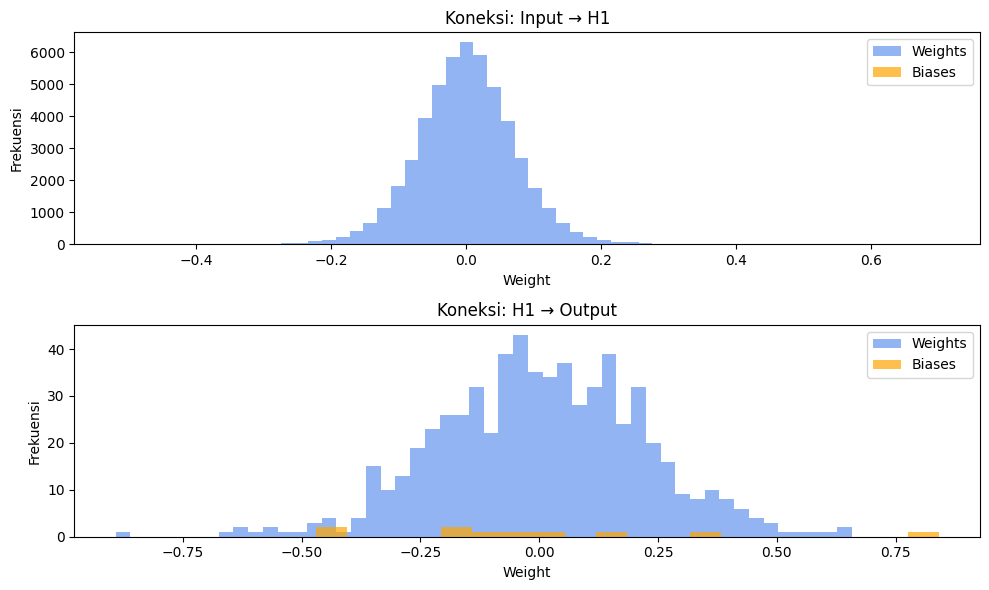

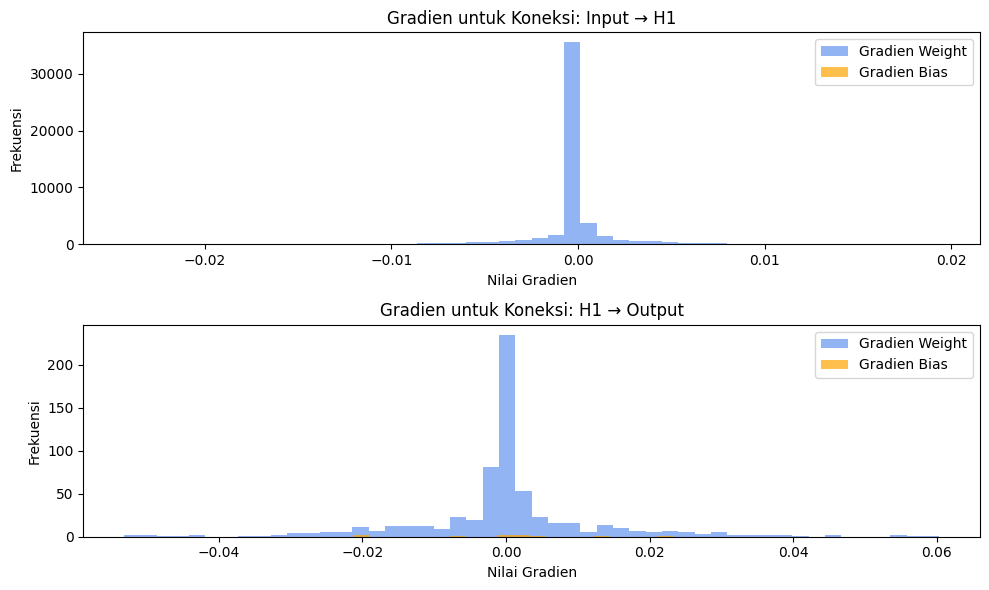

In [11]:
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['linear'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he'
)

print("\nTraining custom FFNN model...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.1,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Accuracy:", ffnn_accuracy)

ffnn_model.plot_loss(ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()